https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

In [1]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.metrics import confusion_matrix

In [2]:
file = tf.keras.utils
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
neg, pos = np.bincount(raw_df['Class'])
neg,  pos

(284315, 492)

In [4]:
# import matplotlib.pyplot as plt
# plt.boxplot(raw_df)
# plt.show()
# raw_df['Time']

In [5]:
raw_df = raw_df.drop(columns=['Time'])
# The `Amount` column covers a huge range. Convert to log-space.
eps=0.001 # 0 => 0.1¢
raw_df['Amount'] = np.log(raw_df['Amount']+eps)

X = raw_df.drop(columns=['Class'])
Y = raw_df['Class']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X);	X = scaler.transform(X)
x_train_all, x_test, y_train_all, y_test = train_test_split(X, Y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, test_size=0.2)

In [6]:
x_train.shape

(182276, 29)

In [ ]:
pip install autokeras

In [ ]:
!pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc0
!pip install autokeras==1.0.3

In [ ]:
import autokeras as ak

clf = ak.StructuredDataClassifier()
clf.fit(x_train_all, y_train_all)
results = clf.predict(x_test)

Epoch 1/1000
5697/5697 [==============================] - 17s 3ms/step - loss: 0.0066 - accuracy: 0.9990 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 2/1000
5697/5697 [==============================] - 17s 3ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 3/1000
5697/5697 [==============================] - 17s 3ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 4/1000
5697/5697 [==============================] - 16s 3ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 5/1000
5697/5697 [==============================] - 17s 3ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 6/1000
5697/5697 [==============================] - 17s 3ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 7/1000
5697/5697 [==============================] - 17s 3ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0

Epoch 1/1000
5697/5697 [==============================] - 153s 27ms/step - loss: 0.0076 - accuracy: 0.9989 - val_loss: 0.0099 - val_accuracy: 0.9993
Epoch 2/1000
5697/5697 [==============================] - 158s 28ms/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0093 - val_accuracy: 0.9993
Epoch 3/1000
5697/5697 [==============================] - 150s 26ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0073 - val_accuracy: 0.9993
Epoch 4/1000
5697/5697 [==============================] - 155s 27ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0065 - val_accuracy: 0.9993
Epoch 5/1000
5697/5697 [==============================] - 152s 27ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0067 - val_accuracy: 0.9992
Epoch 6/1000
5697/5697 [==============================] - 147s 26ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0072 - val_accuracy: 0.9993
Epoch 7/1000
5697/5697 [==============================] - 154s 27ms/step - loss: 0.0027 - accuracy: 0.9994

Epoch 1/1000
5697/5697 [==============================] - 19s 3ms/step - loss: 0.0223 - accuracy: 0.9968 - val_loss: 0.0047 - val_accuracy: 0.9993
Epoch 2/1000
5697/5697 [==============================] - 19s 3ms/step - loss: 0.0065 - accuracy: 0.9989 - val_loss: 0.0063 - val_accuracy: 0.9993
Epoch 3/1000
5697/5697 [==============================] - 19s 3ms/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: 0.0073 - val_accuracy: 0.9993
Epoch 4/1000
5697/5697 [==============================] - 19s 3ms/step - loss: 0.0046 - accuracy: 0.9991 - val_loss: 0.0092 - val_accuracy: 0.9993
Epoch 5/1000
5697/5697 [==============================] - 19s 3ms/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0070 - val_accuracy: 0.9993
Epoch 6/1000
5697/5697 [==============================] - 19s 3ms/step - loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.0093 - val_accuracy: 0.9993
Epoch 7/1000
5697/5697 [==============================] - 19s 3ms/step - loss: 0.0039 - accuracy: 0.9992 - val_loss: 0

Epoch 1/1000
5697/5697 [==============================] - 15s 3ms/step - loss: 0.0086 - accuracy: 0.9984 - val_loss: 0.0054 - val_accuracy: 0.9993
Epoch 2/1000
5697/5697 [==============================] - 15s 3ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0051 - val_accuracy: 0.9994
Epoch 3/1000
5697/5697 [==============================] - 15s 3ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0053 - val_accuracy: 0.9994
Epoch 4/1000
5697/5697 [==============================] - 15s 3ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0051 - val_accuracy: 0.9994
Epoch 5/1000
5697/5697 [==============================] - 15s 3ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0050 - val_accuracy: 0.9994
Epoch 6/1000
5697/5697 [==============================] - 15s 3ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0052 - val_accuracy: 0.9993
Epoch 7/1000
5697/5697 [==============================] - 15s 3ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0

Epoch 1/1000
5697/5697 [==============================] - 36s 6ms/step - loss: 0.0110 - accuracy: 0.9984 - val_loss: 0.0160 - val_accuracy: 0.9993
Epoch 2/1000
5697/5697 [==============================] - 36s 6ms/step - loss: 0.0065 - accuracy: 0.9991 - val_loss: 0.0132 - val_accuracy: 0.9993
Epoch 3/1000
5697/5697 [==============================] - 36s 6ms/step - loss: 0.0058 - accuracy: 0.9992 - val_loss: 0.0163 - val_accuracy: 0.9993
Epoch 4/1000
5697/5697 [==============================] - 36s 6ms/step - loss: 0.0051 - accuracy: 0.9992 - val_loss: 0.0121 - val_accuracy: 0.9993
Epoch 5/1000
5697/5697 [==============================] - 36s 6ms/step - loss: 0.0046 - accuracy: 0.9992 - val_loss: 0.0082 - val_accuracy: 0.9993
Epoch 6/1000
5697/5697 [==============================] - 36s 6ms/step - loss: 0.0045 - accuracy: 0.9992 - val_loss: 0.0077 - val_accuracy: 0.9993
Epoch 7/1000
5697/5697 [==============================] - 36s 6ms/step - loss: 0.0044 - accuracy: 0.9992 - val_loss: 0

Epoch 1/1000
5697/5697 [==============================] - 17s 3ms/step - loss: 0.0076 - accuracy: 0.9990 - val_loss: 0.0048 - val_accuracy: 0.9993
Epoch 2/1000
5697/5697 [==============================] - 17s 3ms/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0053 - val_accuracy: 0.9993
Epoch 3/1000
5697/5697 [==============================] - 17s 3ms/step - loss: 0.0048 - accuracy: 0.9994 - val_loss: 0.0057 - val_accuracy: 0.9993
Epoch 4/1000
5697/5697 [==============================] - 17s 3ms/step - loss: 0.0049 - accuracy: 0.9994 - val_loss: 0.0062 - val_accuracy: 0.9993
Epoch 5/1000
5697/5697 [==============================] - 17s 3ms/step - loss: 0.0054 - accuracy: 0.9993 - val_loss: 0.0057 - val_accuracy: 0.9993
Epoch 6/1000
5697/5697 [==============================] - 17s 3ms/step - loss: 0.0043 - accuracy: 0.9994 - val_loss: 0.0071 - val_accuracy: 0.9993
Epoch 7/1000
5697/5697 [==============================] - 18s 3ms/step - loss: 0.0040 - accuracy: 0.9994 - val_loss: 0

Epoch 1/1000
5697/5697 [==============================] - 28s 5ms/step - loss: 0.0070 - accuracy: 0.9991 - val_loss: 0.0151 - val_accuracy: 0.9993
Epoch 2/1000
5697/5697 [==============================] - 28s 5ms/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0088 - val_accuracy: 0.9993
Epoch 3/1000
5697/5697 [==============================] - 29s 5ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0090 - val_accuracy: 0.9993
Epoch 4/1000
5697/5697 [==============================] - 29s 5ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0068 - val_accuracy: 0.9993
Epoch 5/1000
5697/5697 [==============================] - 28s 5ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0075 - val_accuracy: 0.9993
Epoch 6/1000
5697/5697 [==============================] - 28s 5ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0061 - val_accuracy: 0.9993
Epoch 7/1000
5697/5697 [==============================] - 28s 5ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0

Epoch 1/1000
5697/5697 [==============================] - 18s 3ms/step - loss: 0.0054 - accuracy: 0.9992 - val_loss: 0.0061 - val_accuracy: 0.9993
Epoch 2/1000
5697/5697 [==============================] - 18s 3ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0064 - val_accuracy: 0.9993
Epoch 3/1000
5697/5697 [==============================] - 18s 3ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0055 - val_accuracy: 0.9993
Epoch 4/1000
5697/5697 [==============================] - 18s 3ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0062 - val_accuracy: 0.9993
Epoch 5/1000
5697/5697 [==============================] - 18s 3ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0065 - val_accuracy: 0.9994
Epoch 6/1000
5697/5697 [==============================] - 19s 3ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0075 - val_accuracy: 0.9993
Epoch 7/1000
5697/5697 [==============================] - 18s 3ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0

Epoch 1/1000
5697/5697 [==============================] - 20s 3ms/step - loss: 0.0071 - accuracy: 0.9991 - val_loss: 0.0049 - val_accuracy: 0.9993
Epoch 2/1000
5697/5697 [==============================] - 20s 3ms/step - loss: 0.0050 - accuracy: 0.9993 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 3/1000
5697/5697 [==============================] - 20s 3ms/step - loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.0046 - val_accuracy: 0.9993
Epoch 4/1000
5697/5697 [==============================] - 20s 4ms/step - loss: 0.0041 - accuracy: 0.9994 - val_loss: 0.0047 - val_accuracy: 0.9993
Epoch 5/1000
5697/5697 [==============================] - 20s 3ms/step - loss: 0.0043 - accuracy: 0.9994 - val_loss: 0.0048 - val_accuracy: 0.9993
Epoch 6/1000
5697/5697 [==============================] - 20s 3ms/step - loss: 0.0039 - accuracy: 0.9994 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 7/1000
5697/5697 [==============================] - 20s 3ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0

Epoch 1/1000
5697/5697 [==============================] - 14s 3ms/step - loss: 0.0101 - accuracy: 0.9989 - val_loss: 0.0043 - val_accuracy: 0.9993
Epoch 2/1000
5697/5697 [==============================] - 14s 2ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 3/1000
5697/5697 [==============================] - 14s 2ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0035 - val_accuracy: 0.9993
Epoch 4/1000
5697/5697 [==============================] - 14s 3ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 5/1000
5697/5697 [==============================] - 14s 3ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 6/1000
5697/5697 [==============================] - 14s 2ms/step - loss: 0.0030 - accuracy: 0.9995 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 7/1000
5697/5697 [==============================] - 14s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0

Epoch 1/1000
5697/5697 [==============================] - 51s 9ms/step - loss: 0.0088 - accuracy: 0.9991 - val_loss: 0.0067 - val_accuracy: 0.9993
Epoch 2/1000
5697/5697 [==============================] - 52s 9ms/step - loss: 0.0073 - accuracy: 0.9992 - val_loss: 0.0072 - val_accuracy: 0.9993
Epoch 3/1000
5697/5697 [==============================] - 48s 8ms/step - loss: 0.0076 - accuracy: 0.9991 - val_loss: 0.0071 - val_accuracy: 0.9993
Epoch 4/1000
5697/5697 [==============================] - 46s 8ms/step - loss: 0.0073 - accuracy: 0.9992 - val_loss: 0.0080 - val_accuracy: 0.9993
Epoch 5/1000
5697/5697 [==============================] - 44s 8ms/step - loss: 0.0088 - accuracy: 0.9992 - val_loss: 0.0068 - val_accuracy: 0.9993
Epoch 6/1000
5697/5697 [==============================] - 46s 8ms/step - loss: 0.0073 - accuracy: 0.9992 - val_loss: 0.0091 - val_accuracy: 0.9993
Epoch 7/1000
5697/5697 [==============================] - 41s 7ms/step - loss: 0.0080 - accuracy: 0.9992 - val_loss: 0

Epoch 1/1000
5697/5697 [==============================] - 15s 3ms/step - loss: 0.0087 - accuracy: 0.9982 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 2/1000
5697/5697 [==============================] - 14s 2ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 3/1000
5697/5697 [==============================] - 14s 2ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0035 - val_accuracy: 0.9993
Epoch 4/1000
5697/5697 [==============================] - 14s 3ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 5/1000
5697/5697 [==============================] - 14s 2ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 6/1000
5697/5697 [==============================] - 14s 2ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 7/1000
5697/5697 [==============================] - 14s 2ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0

Epoch 1/1000
5697/5697 [==============================] - 62s 11ms/step - loss: 0.0075 - accuracy: 0.9988 - val_loss: 0.0075 - val_accuracy: 0.9993
Epoch 2/1000
5697/5697 [==============================] - 71s 12ms/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.0076 - val_accuracy: 0.9993
Epoch 3/1000
5697/5697 [==============================] - 64s 11ms/step - loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.0069 - val_accuracy: 0.9993
Epoch 4/1000
5697/5697 [==============================] - 74s 13ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0081 - val_accuracy: 0.9993
Epoch 5/1000
5697/5697 [==============================] - 65s 11ms/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.0076 - val_accuracy: 0.9993
Epoch 6/1000
5697/5697 [==============================] - 66s 12ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0076 - val_accuracy: 0.9993
Epoch 7/1000
5697/5697 [==============================] - 68s 12ms/step - loss: 0.0033 - accuracy: 0.9993 - val_

Epoch 1/1000
5697/5697 [==============================] - 48s 8ms/step - loss: 0.0079 - accuracy: 0.9985 - val_loss: 0.0079 - val_accuracy: 0.9993
Epoch 2/1000
5697/5697 [==============================] - 56s 10ms/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 0.0088 - val_accuracy: 0.9993
Epoch 3/1000
5697/5697 [==============================] - 60s 10ms/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0110 - val_accuracy: 0.9993
Epoch 4/1000
5697/5697 [==============================] - 58s 10ms/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0085 - val_accuracy: 0.9993
Epoch 5/1000
5697/5697 [==============================] - 54s 9ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0095 - val_accuracy: 0.9993
Epoch 6/1000
5697/5697 [==============================] - 50s 9ms/step - loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.0076 - val_accuracy: 0.9993
Epoch 7/1000
5697/5697 [==============================] - 65s 11ms/step - loss: 0.0035 - accuracy: 0.9993 - val_los

Epoch 1/1000
5697/5697 [==============================] - 15s 3ms/step - loss: 0.0102 - accuracy: 0.9985 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 2/1000
5697/5697 [==============================] - 14s 3ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0035 - val_accuracy: 0.9993
Epoch 3/1000
5697/5697 [==============================] - 14s 2ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 4/1000
5697/5697 [==============================] - 14s 3ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 5/1000
5697/5697 [==============================] - 15s 3ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 6/1000
5697/5697 [==============================] - 14s 3ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 7/1000
5697/5697 [==============================] - 14s 3ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0

Epoch 1/1000
5697/5697 [==============================] - 86s 15ms/step - loss: 0.0086 - accuracy: 0.9990 - val_loss: 0.0081 - val_accuracy: 0.9993
Epoch 2/1000
5697/5697 [==============================] - 90s 16ms/step - loss: 0.0060 - accuracy: 0.9991 - val_loss: 0.0057 - val_accuracy: 0.9994
Epoch 3/1000
5697/5697 [==============================] - 87s 15ms/step - loss: 0.0062 - accuracy: 0.9991 - val_loss: 0.0057 - val_accuracy: 0.9993
Epoch 4/1000
5697/5697 [==============================] - 88s 16ms/step - loss: 0.0054 - accuracy: 0.9990 - val_loss: 0.0081 - val_accuracy: 0.9993
Epoch 5/1000
5697/5697 [==============================] - 86s 15ms/step - loss: 0.0047 - accuracy: 0.9990 - val_loss: 0.0083 - val_accuracy: 0.9993
Epoch 6/1000
5697/5697 [==============================] - 85s 15ms/step - loss: 0.0048 - accuracy: 0.9990 - val_loss: 0.0059 - val_accuracy: 0.9992
Epoch 7/1000
5697/5697 [==============================] - 85s 15ms/step - loss: 0.0048 - accuracy: 0.9990 - val_

Epoch 1/1000
5697/5697 [==============================] - 16s 3ms/step - loss: 0.0058 - accuracy: 0.9992 - val_loss: 0.0043 - val_accuracy: 0.9993
Epoch 2/1000
5697/5697 [==============================] - 16s 3ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 3/1000
5697/5697 [==============================] - 16s 3ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 4/1000
5697/5697 [==============================] - 16s 3ms/step - loss: 0.0031 - accuracy: 0.9995 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 5/1000
5697/5697 [==============================] - 16s 3ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 6/1000
5697/5697 [==============================] - 16s 3ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 7/1000
5697/5697 [==============================] - 15s 3ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0

Epoch 1/1000
5697/5697 [==============================] - 19s 3ms/step - loss: 0.0245 - accuracy: 0.9951 - val_loss: 0.0066 - val_accuracy: 0.9993
Epoch 2/1000
5697/5697 [==============================] - 19s 3ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0054 - val_accuracy: 0.9994
Epoch 3/1000
5697/5697 [==============================] - 20s 3ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0062 - val_accuracy: 0.9993
Epoch 4/1000
5697/5697 [==============================] - 20s 4ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0053 - val_accuracy: 0.9993
Epoch 5/1000
5697/5697 [==============================] - 19s 3ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0060 - val_accuracy: 0.9993
Epoch 6/1000
5697/5697 [==============================] - 19s 3ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0054 - val_accuracy: 0.9994
Epoch 7/1000
5697/5697 [==============================] - 20s 4ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0

Epoch 1/1000
5697/5697 [==============================] - 81s 14ms/step - loss: 0.0063 - accuracy: 0.9992 - val_loss: 0.0068 - val_accuracy: 0.9992
Epoch 2/1000
5697/5697 [==============================] - 82s 14ms/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0059 - val_accuracy: 0.9993
Epoch 3/1000
5697/5697 [==============================] - 75s 13ms/step - loss: 0.0041 - accuracy: 0.9994 - val_loss: 0.0059 - val_accuracy: 0.9993
Epoch 4/1000
5697/5697 [==============================] - 71s 13ms/step - loss: 0.0041 - accuracy: 0.9994 - val_loss: 0.0063 - val_accuracy: 0.9993
Epoch 5/1000
5697/5697 [==============================] - 74s 13ms/step - loss: 0.0040 - accuracy: 0.9994 - val_loss: 0.0062 - val_accuracy: 0.9993
Epoch 6/1000
5697/5697 [==============================] - 76s 13ms/step - loss: 0.0043 - accuracy: 0.9993 - val_loss: 0.0101 - val_accuracy: 0.9992
Epoch 7/1000
5697/5697 [==============================] - 68s 12ms/step - loss: 0.0038 - accuracy: 0.9994 - val_

Epoch 1/1000


In [ ]:
from tensorflow import keras

metrics_nm = ['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
model = tf.keras.models.Sequential([
      keras.layers.Dense(16, activation='relu', input_shape=(x_train.shape[-1],)),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(1, activation='sigmoid'),
  ])
model.compile(optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics_nm)

In [ ]:
hist = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=30,
    validation_data=(x_val, y_val), 
    verbose=0)

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'auc', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_auc', 'val_precision', 'val_recall'])

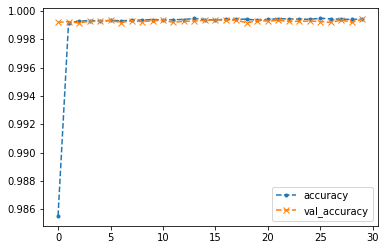

In [ ]:
import matplotlib.pyplot as plt
# plt.plot(hist.history['loss'], 'x--', label='loss')
# plt.plot(hist.history['val_loss'], 'x--', label='val_loss')
plt.plot(hist.history['accuracy'], '.--', label='accuracy')
plt.plot(hist.history['val_accuracy'], 'x--', label='val_accuracy')
# plt.plot(hist.history['auc'], 'x--', label='auc')
# plt.plot(hist.history['val_auc'], 'x--', label='val_auc')
plt.legend()

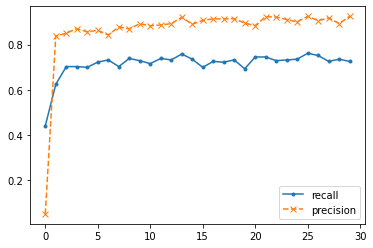

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['recall'], '.-', label='recall')
# plt.plot(hist.history['val_recall'], '.-', label='val_recall')
plt.plot(hist.history['precision'], 'x--', label='precision')
# plt.plot(hist.history['val_precision'], 'x--', label='val_precision')
plt.legend()

In [ ]:
# # neg, pos = np.bincount(Y)
# neg, pos = np.bincount(y_train)
# total = neg + pos
# weight_neg = (1 / neg)*(total)/2.0 
# weight_pos = (1 / pos)*(total)/2.0

# class_weight = {0: weight_neg, 1: weight_pos}
# class_weight

In [ ]:
np.unique(Y)

array([0, 1])

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced', np.unique(y_train), y_train)
class_weight = dict(enumerate(weights))
# class_weight = {0: weights[0], 1: weights[1]}
class_weight

{0: 0.5008407979337254, 1: 297.83660130718954}

In [ ]:
metrics_nm = ['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
model = tf.keras.models.Sequential([
      keras.layers.Dense(16, activation='relu', input_shape=(x_train.shape[-1],)),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(1, activation='sigmoid'),
  ])
model.compile(optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics_nm)

In [ ]:
weighted_hist = weighted_model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=30,
    validation_data=(x_val, y_val), 
    # steps_per_epoch=278,
    class_weight=class_weight,
    # class_weight='auto',
    verbose=0)

In [ ]:
weighted_hist.history.keys()

dict_keys(['loss', 'accuracy', 'auc_2', 'precision_2', 'recall_2', 'val_loss', 'val_accuracy', 'val_auc_2', 'val_precision_2', 'val_recall_2'])

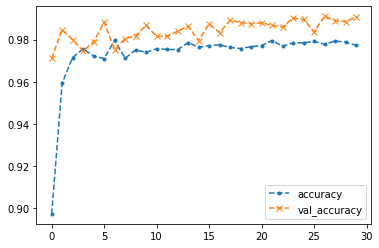

In [ ]:
import matplotlib.pyplot as plt
# plt.plot(weighted_hist.history['loss'], 'x--', label='loss')
# plt.plot(weighted_hist.history['val_loss'], 'x--', label='val_loss')
plt.plot(weighted_hist.history['accuracy'], '.--', label='accuracy')
plt.plot(weighted_hist.history['val_accuracy'], 'x--', label='val_accuracy')
# plt.plot(weighted_hist.history['auc_2'], 'x--', label='auc')
# plt.plot(weighted_hist.history['val_auc_2'], 'x--', label='val_auc')
plt.legend()

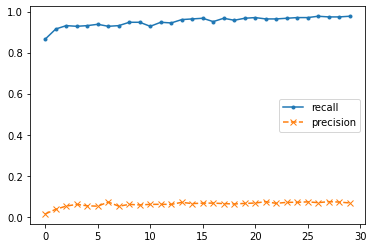

In [ ]:
import matplotlib.pyplot as plt
plt.plot(weighted_hist.history['recall_1'], '.-', label='recall')
# plt.plot(weighted_hist.history['val_recall'], '.-', label='val_recall')
plt.plot(weighted_hist.history['precision_1'], 'x--', label='precision')
# plt.plot(weighted_hist.history['val_precision'], 'x--', label='val_precision')
plt.legend()

In [ ]:
import sklearn
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)
  # print(fp, tp, _)
  plt.plot(100*fp, 100*tp, label=name)
  # plt.xlabel('False positives [%]')
  # plt.ylabel('True positives [%]')
  # plt.xlim([-0.5,20])
  plt.ylim([80,100.9])
  # plt.grid(True)
  # ax = plt.gca()
  # ax.set_aspect('equal')

[0.         0.         0.         ... 0.99959558 0.99975383 1.        ] [0.         0.11111111 0.43333333 ... 1.         1.         1.        ] [2.0000000e+00 1.0000000e+00 9.8747414e-01 ... 1.7022079e-36 3.2780107e-38
 0.0000000e+00]
[0.00000000e+00 2.46166831e-04 2.46166831e-04 ... 9.99490083e-01
 9.99964833e-01 1.00000000e+00] [0.         0.63333333 0.68888889 ... 1.         1.         1.        ] [2.0000000e+00 1.0000000e+00 9.9999923e-01 ... 2.2688394e-28 8.5533268e-38
 0.0000000e+00]


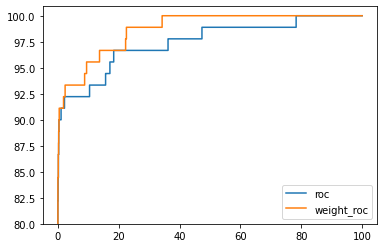

In [ ]:
weighted_pred = weighted_model.predict(x_test)
plot_roc('roc', y_test, pred)
plot_roc('weight_roc', y_test, weighted_pred)
plt.legend()